# Simulating Covid-19 Economic Impact on Bank Transactions
Purpose of this workbook is to generate a nother data set to simulate the effects of Covid on Spain on the data set.

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statistics import mean



### 2) Read in cleaned version of the original dataset
The original dataset was used to train the recommendation system in `logistic_regression.py`

In [ ]:
print("Current Working Directory:", os.getcwd()) 

# Define file paths for training and testing data
file_path_train = os.path.join("../..", "artifacts", "reco_sys_train_data.csv")  
file_path_test = os.path.join("../..", "artifacts", "reco_sys_test_data.csv")  

# Print the paths to verify
print("Training Data Path:", file_path_train)
print("Testing Data Path:", file_path_test)

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

### Data manipulation
Here we manipulate only two columns:
- gross_income
- deceased_index 

Due to a meteor strike, the 2 variables that change the most will be the gross_income which can vary quite a bit due to some pay cuts or loss of jobs due to the shut down of different production channels

For the deceased_index, it increases slightly as some died due to the disease

Setting seed

In [ ]:
np.random.seed(1000)

Part 1: Manipulate gross income of customers

In [ ]:
def manipulate_gross_income(df,percentage):
    lambda_inv = mean(df['gross_income'])*(percentage/100)

    gross_income_dec = np.random.exponential(scale=lambda_inv, size = len(df))
    final_income = []
    for i in range(0,len(df)):
        inc = df['gross_income'].iloc[i]-gross_income_dec[i]
        if inc<0:
            final_income.append(0)
        else:
            final_income.append(inc)
    return final_income

In [ ]:
Part 2: Manipulate deceased_index of customers

In [ ]:
def manipulate_deceased_index(df,percentage):
    new_deceased = []
    for i in range(0,len(df_train)):
        if df_train['deceased_index_S'].iloc[i] == 0:
            if(np.random.rand()<(percentage/100)):
                new_deceased.append(1)
            else:
                new_deceased.append(0)
        else:
           new_deceased.append(0)
    return new_deceased
    
    

In [ ]:
# data transformation train Meteor
#input_file = "clean_train_reco.csv" # input CSV file
output_file = "clean_train_reco_covid.csv" # output CSV file

In [ ]:
#df_train = pd.read_csv(input_file)

In [ ]:
Train dataset before transformations

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_train.columns.to_list()
df_train.head()

Distribution of gross income for train data

In [ ]:
#portion where we manipulate columns for different events

#Covid overall decrease of 10% of economy over assumed 2 years, 10/24 % per month on average

#histogram of gross income
plt.hist(df_train['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 
#results is an exponential

## Decrease of 10/24 % of overall income for train

In [ ]:
new_income = manipulate_gross_income(df_train,10/24)
df_train['gross_income'] = new_income

## overall 0.15% died over assumed 2 years, average 0.15/24 % for train

In [ ]:
new_deceased_index = manipulate_deceased_index(df_train,0.15/24)
df_train['deceased_index_S'] = new_deceased_index

Train dataset after transformations 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_train.columns.to_list()
df_train.head()

In [32]:
df_train.to_csv(output_file, index=False)

In [33]:
# data transformation test Covid
#input_file = "clean_test_reco.csv" # input CSV file
output_file = "clean_test_reco_meteor.csv" # output CSV file

In [34]:
#df_test = pd.read_csv(input_file)

In [ ]:
Test dataset before transformations 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_test.columns.to_list()
df_test.head()

Distribution of gross income for test data

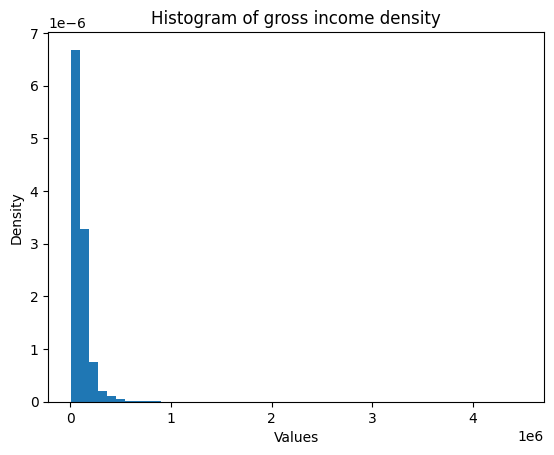

In [35]:
#portion where we manipulate columns for different events

#Covid overall decrease of 10% of economy over assumed 2 years, 10/24 %

#histogram of gross income
plt.hist(df_test['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 
#results is an exponential

## Decrease of 10/24 % of overall income for test

In [ ]:
new_income = manipulate_gross_income(df_train,10/24)
df_train['gross_income'] = new_income

## overall 0.15% died over assumed 2 years, average 0.15/24 % for test

In [ ]:
new_deceased_index = manipulate_deceased_index(df_train,0.15/24)
df_train['deceased_index_S'] = new_deceased_index

Test dataset after transformations 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_test.columns.to_list()
df_test.head()

In [37]:
df_test.to_csv(output_file, index=False)